It will be needed to upload an input file here so that the script will be able to process it. To do the upload, we will need an uploader widget. Run the following cell to perform all the installs and imports for your word cloud script and uploader widget. It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing.

Enabling notebook extension fileupload/extension...
- Validating: OK

#### Here are all the installs and imports you will need for your word cloud script and uploader widget

In [1]:
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Installing c:\users\janyfer\appdata\local\programs\python\python37\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\Janyfer\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\Janyfer\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\Janyfer\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload the text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

#### This is the uploader widget

In [2]:
def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `pride and prejudice.txt` (771.81 kB)


The uploader widget saved the contents of the uploaded file into a string object named *file_contents* that my word cloud script can process.
<br><br>
Function in the cell below iterates through the words in *file_contents*, removes punctuation, counts the frequency of each word, it ignore word case, and words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate  our very own word cloud!
<br><br>
I have stored the results of the iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [3]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    non_punctuation_file_contents = ""
    for char in file_contents:
        if char not in punctuations:
            non_punctuation_file_contents += char
    words = non_punctuation_file_contents.split()
    interesting_words = []
    frequencies = {}
    for word in words:
        if word.isalpha():
            if word not in uninteresting_words:
                interesting_words.append(word)
    for alpha_word in interesting_words:
        if alpha_word not in frequencies:
            frequencies[alpha_word] = 1
        else:
            frequencies[alpha_word] += 1
            
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequencies)
    return cloud.to_array()

#### Display wordcloud image

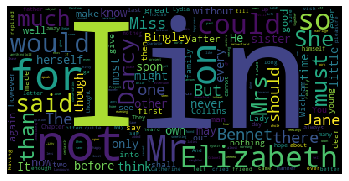

In [4]:
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()